# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
import joblib
# omsky_gamedev

# Загрузка датасета для регрессии.

In [2]:
models = pd.read_csv('../../Data/energy_task_moded_removed_nan.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11,1,2016,1020
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11,1,2016,1030
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11,1,2016,1040
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11,1,2016,1050
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11,1,2016,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18533,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27,5,2016,1040
18534,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27,5,2016,1050
18535,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27,5,2016,1060
18536,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27,5,2016,1070


# Разбиваем на выборку

In [3]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [4]:
line_regression_classic = LinearRegression().fit(X_train, y_train)
line_regression_classic.predict(X_test)

array([69.81208327, 39.76333204, 99.92638504, ..., 87.61470231,
       54.7734327 , 86.31337066])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [5]:
y_predicted = line_regression_classic.predict(X_test)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test), 
                          'RMSE': mean_squared_error(y_predicted, y_test),
                          'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                          'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                          'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_classic.score(X_test, y_test)}',
      sep='\n')


MAE: 52.93546791460476
RMSE: 8645.303450059004
MSE: 92.98012395162206
MAPE: 1.4082091482584576
R^2: 0.1616644964782582


### Значение весов.

In [6]:
print(len(line_regression_classic.coef_), line_regression_classic.coef_, sep='\n')


29
[ 1.85446569e+00 -2.56347565e+00  1.55180048e+01 -2.03950429e+01
 -1.39057533e+01  2.63979803e+01  4.28437759e+00 -2.66895458e+00
 -1.43348518e+00  2.52748794e-01 -1.17558874e-01  7.17802348e+00
  4.55625340e-02 -8.98546452e-01 -1.12157996e+00  1.01756528e+01
 -4.16658955e+00 -1.01977534e+01  2.80804871e-01 -7.59799425e+00
  2.45829863e-01 -2.75913802e-01  2.21523999e+00  2.14422190e-01
  2.42837709e+00 -1.34386969e-01 -9.70809419e+00  0.00000000e+00
  1.74726392e-02]


### Предварительные результаты

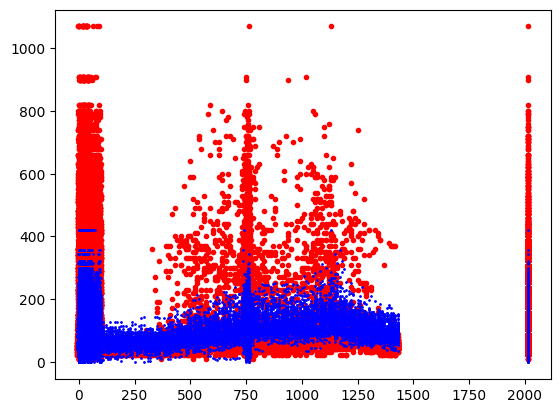

In [7]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [8]:
ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
ridge_optimal_for_line_regression.best_params_

{'alpha': 94}

In [9]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(a, b, i)}).fit(X_train, y_train)
    if (ridge_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_line_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_line_regression.best_params_['alpha']-i
        b = ridge_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_line_regression.best_params_['alpha']  


    

93.5050000000001

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [10]:
line_regression_ridge = Ridge(alpha=ridge_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predicted = line_regression_ridge.predict(X_test)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                'RMSE': mean_squared_error(y_predicted, y_test),
                                'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {ridge_optimal_for_line_regression.score(X_test, y_test)}',
      sep='\n')
line_regression_ridge.coef_

MAE: 52.87987363046219
RMSE: 8642.69558830827
MSE: 92.96609913462149
MAPE: 0.548288070736519
R^2: 0.16191738096132424


array([ 1.87273341e+00, -2.87209140e+00,  1.50909436e+01, -1.88695264e+01,
       -1.32125452e+01,  2.55886021e+01,  4.27773958e+00, -2.91541154e+00,
       -1.55081922e+00, -2.39975961e-02, -1.18035367e-01,  6.90779751e+00,
        4.55020324e-02, -9.97104118e-01, -1.17465851e+00,  9.85996147e+00,
       -4.10964085e+00, -9.66496517e+00,  3.00314476e-01, -6.99614244e+00,
        2.34391246e-01, -2.05676745e-01,  2.25427972e+00,  2.13947758e-01,
        1.91181657e+00, -1.02472302e-01, -8.95445659e+00,  0.00000000e+00,
        1.76659638e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [11]:
lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.341e+07, tolerance: 8.110e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

In [12]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
    if (lasso_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_line_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_line_regression.best_params_['alpha']-i
        b = lasso_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.341e+07, tolerance: 8.110e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [13]:
line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predicted = line_regression_lasso.predict(X_test)
line_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                               'RMSE': mean_squared_error(y_predicted, y_test),
                               'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                               'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                               'R^2': line_regression_lasso.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_lasso.score(X_test, y_test)}',
      sep='\n')
line_regression_lasso.coef_

C:\Users\Mike\AppData\Local\Temp\ipykernel_15336\860381744.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: 52.93545024284487
RMSE: 8645.303839316079
MSE: 92.98012604484938
MAPE: 1.3464304154892395
R^2: 0.16166445873198032


c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.108e+07, tolerance: 9.926e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([ 1.85446640e+00, -2.56376537e+00,  1.55180090e+01, -2.03947852e+01,
       -1.39056538e+01,  2.63980334e+01,  4.28432891e+00, -2.66892879e+00,
       -1.43347622e+00,  2.52637232e-01, -1.17555738e-01,  7.17771774e+00,
        4.55415972e-02, -8.98656772e-01, -1.12157945e+00,  1.01756588e+01,
       -4.16662846e+00, -1.01975969e+01,  2.80785382e-01, -7.59666122e+00,
        2.45826826e-01, -2.75676604e-01,  2.21527005e+00,  2.14420243e-01,
        2.42731904e+00, -1.34385447e-01, -9.70841015e+00,  0.00000000e+00,
        1.74725566e-02])

# Save Models

In [14]:
joblib.dump(line_regression_classic, '../../Pipelines/Laba1/LineRegressions/LineRegressionClassicModel__cleared.sav')
joblib.dump(line_regression_ridge, '../../Pipelines/Laba1/LineRegressions/LineRegressionRidgeModel__cleared.sav')
joblib.dump(line_regression_lasso, '../../Pipelines/Laba1/LineRegressions/LineRegressionLassoModel__cleared.sav')


['../../Pipelines/Laba1/LineRegressions/LineRegressionLassoModel__cleared.sav']